# Putting Sms Into Work

1. You need to analyse the sms data and answer the questions listed below.
2. You are free to use anything of your choice.
3. The data provided is highly sensitive so please don't share with anyone

In [ ]:
import json
import pandas as pd
import numpy as np
from pandas.io.json import json_normalize #package for flattening json in pandas df

In [ ]:
data = pd.read_json("data_small.json")

In [ ]:
data.head()

,user_message_id,sender,message,timestamp,created_at,user_id,user_subscription_id,okay
0,4317860,ADSBUXIN,"Hi, our siren is at home and safe and we hope ...",2020-03-25 07:33:39.442,2021-09-16 04:43:11.234,40ec6ba2-af1b-4037-9e01-3d108faa937b,NaN,True
1,4317861,TMKOTAKB,"Due to COVID-19, some of the banking services ...",2020-03-25 06:34:38.445,2021-09-16 04:43:11.236,40ec6ba2-af1b-4037-9e01-3d108faa937b,NaN,True
2,4317862,ADMONVEW,Youre a few steps away from completing your Cr...,2020-03-25 06:04:45.183,2021-09-16 04:43:11.238,40ec6ba2-af1b-4037-9e01-3d108faa937b,NaN,True
3,4317863,VKEZHOME,"Hi Niraj, a special Home Loan offer for you: \...",2020-03-25 06:02:46.155,2021-09-16 04:43:11.241,40ec6ba2-af1b-4037-9e01-3d108faa937b,NaN,True
4,4317864,JXJIOMNY,"Dear JioMoney Customer, Pay from Home using My...",2020-03-25 05:54:36.521,2021-09-16 04:43:11.244,40ec6ba2-af1b-4037-9e01-3d108faa937b,NaN,True


In [ ]:
# Listing down all the users id
data["user_id"].unique()

array(['40ec6ba2-af1b-4037-9e01-3d108faa937b',
       'e1eb6177-cf74-4727-b1c5-370d6c1a5fd1',
       '301ff388-c5ae-4dff-b6f5-83103cbbb5d0',
       'e042e6b7-466a-4ba9-af43-90d3eb346ccc',
       '6a453330-9801-4208-b0e0-9bc8f3608ec4',
       '6f28bcf7-9e64-423b-8d7b-ea7c03f5f691',
       'c385fa59-8d9b-4f4e-9f41-ea3dc454b488',
       'feb6542d-b15e-4eac-b1a8-b68b2e8a3f58',
       '8f659f61-b21c-48ae-9a11-e73e0130a02f',
       'cce50213-e98e-4390-bdd5-c86323071760',
       'd526455c-b4e4-4807-b12c-29278a65fe55',
       '05748776-fe93-4f90-8a49-40f1cab76be6',
       '87865ed3-3b06-42fe-bf87-857feff5fb9a',
       'f5a33af3-2852-4ec2-8b8a-967cabbb7864',
       'fcadb10d-c4a8-407a-8c3a-9a11bc7ade75',
       '2f33a137-840d-4a61-8fa2-2b1036c6b4de',
       'c364cbfe-4232-4716-a5d7-11379520e5ba',
       'f1c22112-db6f-42aa-859a-de53c7b82e7b',
       '32f60934-a312-42da-a767-26242c5a236f',
       '940fd2e3-880c-4ec9-8c66-66f7cb25e6a6',
       '6894da3f-a76e-4152-b91e-3bc186107a39',
       '25d3f

In [ ]:
# msg of a given user id
user_msg = data[data["user_id"]=='40ec6ba2-af1b-4037-9e01-3d108faa937b']

In [ ]:
user_msg.head()

,user_message_id,sender,message,timestamp,created_at,user_id,user_subscription_id,okay
0,4317860,ADSBUXIN,"Hi, our siren is at home and safe and we hope ...",2020-03-25 07:33:39.442,2021-09-16 04:43:11.234,40ec6ba2-af1b-4037-9e01-3d108faa937b,NaN,True
1,4317861,TMKOTAKB,"Due to COVID-19, some of the banking services ...",2020-03-25 06:34:38.445,2021-09-16 04:43:11.236,40ec6ba2-af1b-4037-9e01-3d108faa937b,NaN,True
2,4317862,ADMONVEW,Youre a few steps away from completing your Cr...,2020-03-25 06:04:45.183,2021-09-16 04:43:11.238,40ec6ba2-af1b-4037-9e01-3d108faa937b,NaN,True
3,4317863,VKEZHOME,"Hi Niraj, a special Home Loan offer for you: \...",2020-03-25 06:02:46.155,2021-09-16 04:43:11.241,40ec6ba2-af1b-4037-9e01-3d108faa937b,NaN,True
4,4317864,JXJIOMNY,"Dear JioMoney Customer, Pay from Home using My...",2020-03-25 05:54:36.521,2021-09-16 04:43:11.244,40ec6ba2-af1b-4037-9e01-3d108faa937b,NaN,True


In [ ]:
n = len(user_msg)

In [ ]:
# filter out transactional messages(10 pts)
# Hint: Filter messages based on keywords
# .*spent.*
# .*debited.*
# .*charged.*
# .*paid.*
# .*sent.*
# .*txn.*
# .*billed.*
# .*transaction.*

In [ ]:
user_msg = user_msg.reset_index()
# Preprocessing the text for further improved usage
user_msg['message'] = user_msg['message'].apply(lambda x: x.lower().replace('rs.','rs. ').replace('inr.', 'inr. '))

In [ ]:
# to calculate transaction messages for a particular month, using the timestamp to get the month of the first user_message_id
month = str(user_msg['timestamp'].iloc[0])[5:7]
user_msg = user_msg.drop(['user_subscription_id'],axis= 1)
def same_month(x):
    if month == str(user_msg['timestamp'].iloc[x])[5:7]:
        return user_msg['message'].iloc[x]
    else:
        return 'none'

user_msg['message'] =  pd.Series(np.arange(n)).apply(lambda x: same_month(x))
indexes = user_msg[user_msg['message']=='none'].index
user_msg.drop(indexes, inplace=True)

In [ ]:
transaction_keywords = ['spent','debited','charged','credited', 'paid', 'sent', 'txn','spent' 'billed', 'transaction']

In [ ]:
def transaction_messages(df):
    trxn_mssgs = []
    mssgs = df['message'].values
    for mssg in mssgs:
        if any(keyword in mssg.lower() for keyword in transaction_keywords):
            trxn_mssgs.append(mssg)
    return trxn_mssgs

In [ ]:
trxn_mssgs = transaction_messages(user_msg)

In [ ]:
# His expense and earning for a particular month? (40 pts)
# Hint: Use https://duckling.wit.ai/ for parsing money
# Find out total money credited and total money debited

In [ ]:
import duckling

In [ ]:
d = duckling.DucklingWrapper()

In [ ]:
def expenses(trxn_mssgs):
    expense = 0
    Num = 0
    for mssg in trxn_mssgs:
        if 'debited' in mssg.lower():
            if 'credited' not in mssg.lower():
                amounts = d.parse_money(mssg)
                try:
                    amount = amounts[0]['value']['value']
                    expense+= amount
                    Num+= 1
                except:
                    pass
            else:
                Arr = mssg.lower().replace('.',' ').replace(',',' ').split()
                if Arr.index('debited')<Arr.index('credited'):
                    amounts = d.parse_money(mssg)
                    try:
                        amount = amounts[0]['value']['value']
                        expense+= amount
                        Num+= 1
                    except:
                        pass
    return expense, Num

In [ ]:
expense,_ = expenses(trxn_mssgs)
print(expense)

101127.59


In [ ]:
def earnings(trxn_mssgs):
    earning = 0
    Num = 0
    for mssg in trxn_mssgs:
        if 'credited' in mssg.lower():
            if 'debited' not in mssg.lower():
                amounts = d.parse_money(mssg)
                try:
                    amount = amounts[0]['value']['value']
                    earning+= amount
                    Num+= 1
                except:
                    pass
            else:
                Arr = mssg.lower().replace('.',' ').replace(',',' ').split()
                if Arr.index('credited')<Arr.index('debited'):
                    amounts = d.parse_money(mssg)
                    try:
                        amount = amounts[0]['value']['value']
                        earning+= amount
                        Num+= 1
                    except:
                        pass
    return earning, Num

In [ ]:
earning,_ = earnings(trxn_mssgs)
print(earning)

1302032.0


In [ ]:
# Any Extra insights (60 pts)
# https://arxiv.org/pdf/2002.02755.pdf
# https://www.analyticsvidhya.com/blog/2020/07/machine-learning-study-clustering-transactions-text-descriptions/
# https://hasgeek.com/fifthelephant/2017/sub/designing-machine-learning-pipelines-for-mining-tr-HF2RRbi7nJ3qqXVJvEQnYy
# https://medium.com/analytics-vidhya/making-sms-useful-again-db94d92e3490

In [ ]:
len(data['user_id'].unique())

247

In [ ]:
data['sender'].value_counts()

ADHDFCBK         26534
59039029         17212
AXHDFCBK         17111
AD-HDFCBK        15766
VKHDFCBK         14650
                 ...  
QP-FTRNPT            1
QP-SONYCC            1
CP-GOVIBE            1
+919167373771        1
JDSVLIFE             1
Name: sender, Length: 128407, dtype: int64

<AxesSubplot:>

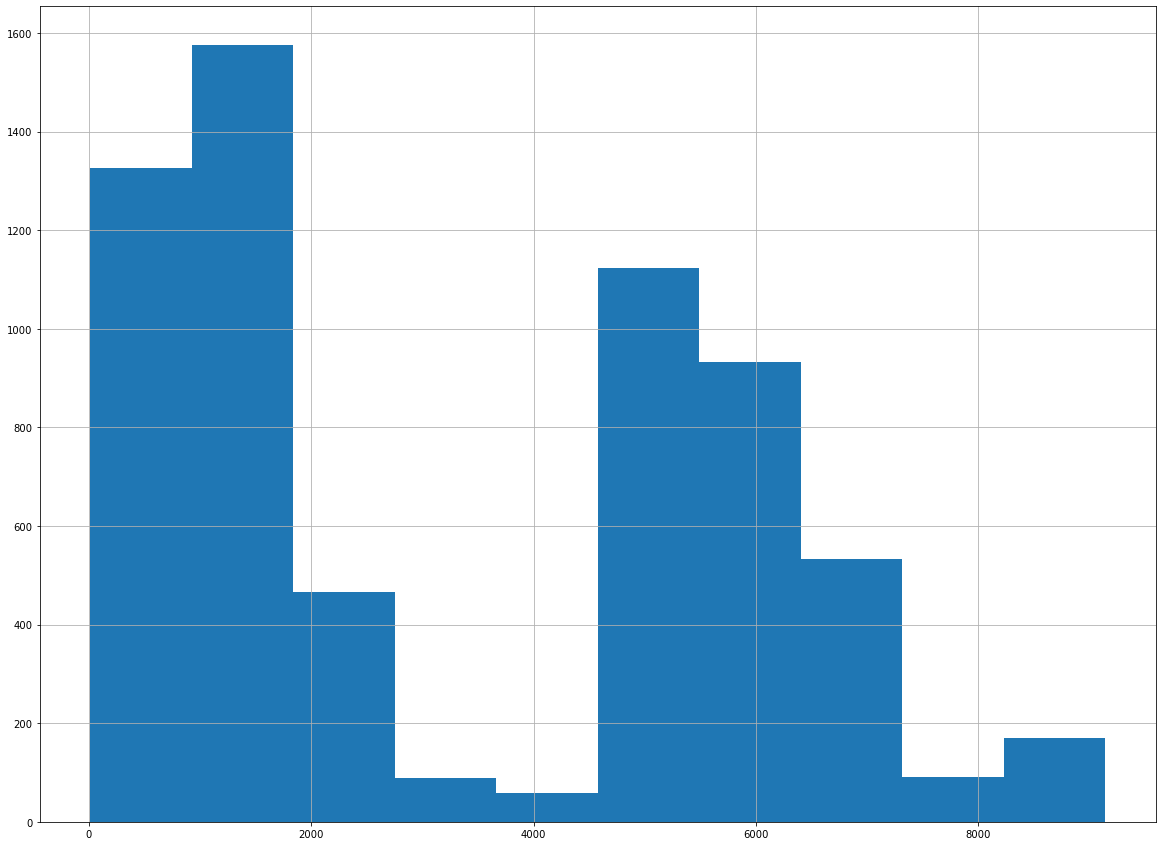

In [ ]:
data['user_subscription_id'].hist()

### total 247 users are there  in smaller version of the dataset
### most messages are from banks such as HDFC, AXIS bank and online sales platform like Amazon  

In [ ]:
mssgs_per_id = []
trxn_mssgs_per_id  = []

user_ids = list(data['user_id'].unique())

for _id in user_ids:
    mssgs = data[data['user_id'] ==  _id]
    mssgs['message'] = mssgs['message'].apply(lambda x: x.lower().replace('rs.','rs. ').replace('inr.', 'inr. '))
    trxn_mssg  = transaction_messages(mssgs)
    
    mssgs_per_id.append(len(mssgs))
    trxn_mssgs_per_id.append(len(trxn_mssg))

In [ ]:
import matplotlib
import seaborn as sns
from scipy.stats import norm
matplotlib.rc('figure', figsize=(20, 15))

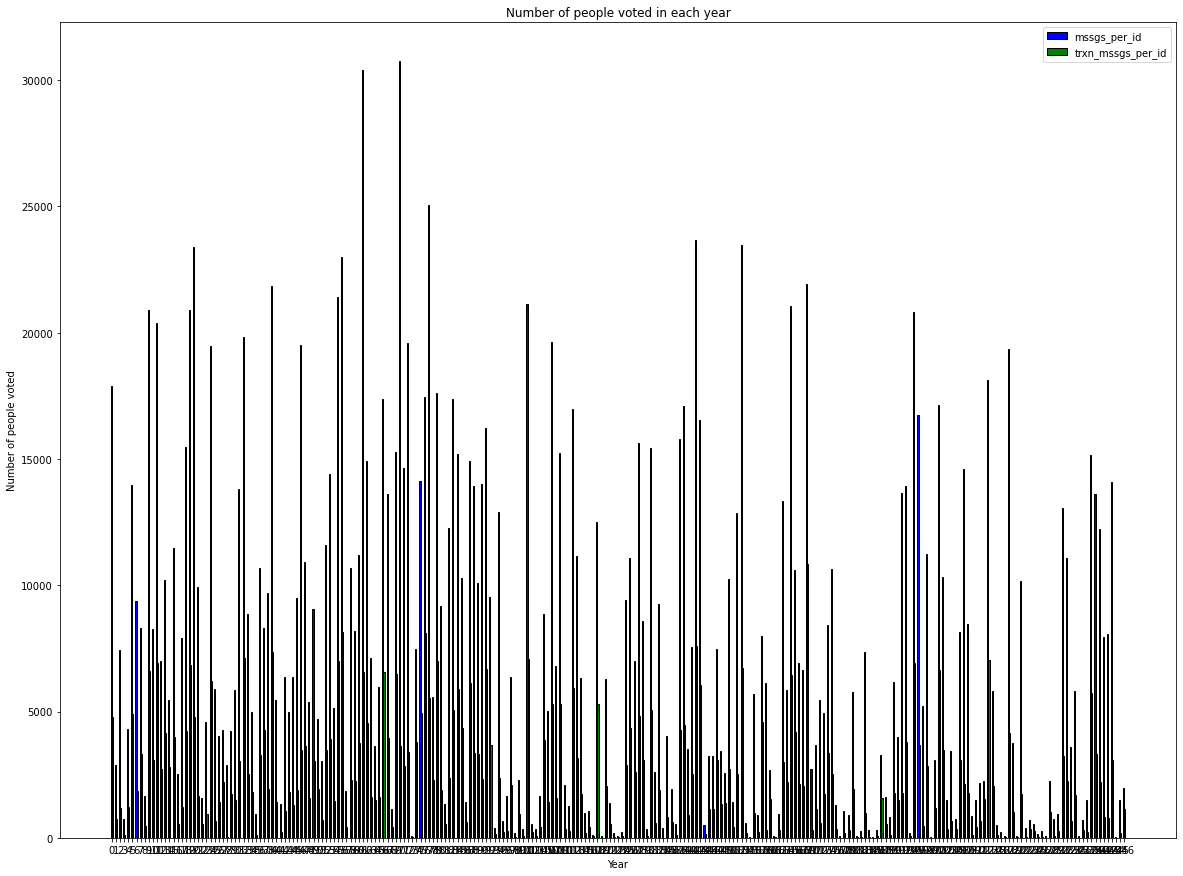

In [ ]:
import matplotlib.pyplot as plt
   

  
n=len(trxn_mssgs_per_id)
r = np.arange(n)
width = 0.25
  
  
plt.bar(r, mssgs_per_id, color = 'b',
        width = width, edgecolor = 'black',
        label='mssgs_per_id')
plt.bar(r + width, trxn_mssgs_per_id, color = 'g',
        width = width, edgecolor = 'black',
        label='trxn_mssgs_per_id')
  
plt.xlabel("Year")
plt.ylabel("Number of people voted")
plt.title("Number of people voted in each year")
  
# plt.grid(linestyle='--')
plt.xticks(r + width/2,r)
plt.legend()
  
plt.show()

In [ ]:
percent = [(trxn_mssgs_per_id[x]/mssgs_per_id[x])*100 for x in range(n)]

/home/harsh/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Occurance in %')

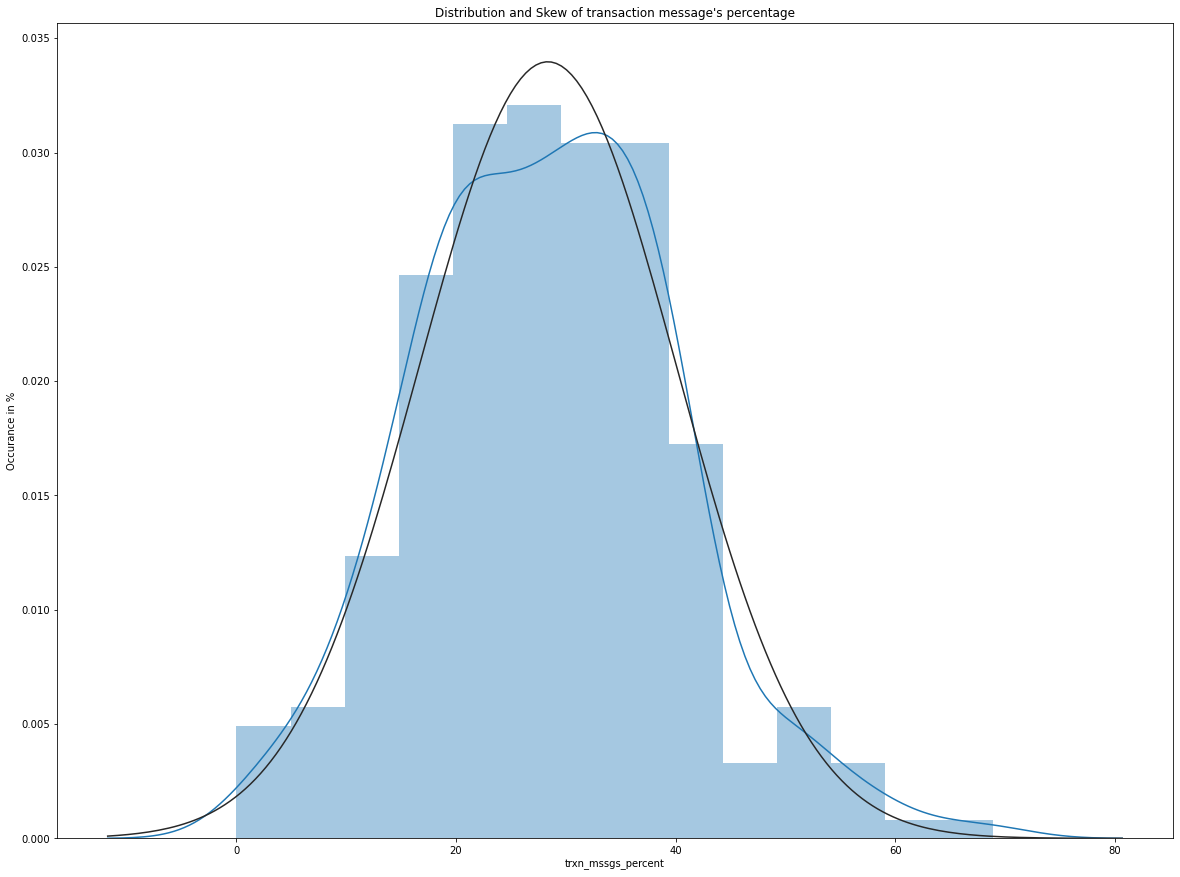

In [ ]:
sns.distplot(percent, fit=norm)
plt.title("Distribution and Skew of transaction message's percentage")
plt.xlabel("trxn_mssgs_percent")
plt.ylabel("Occurance in %")

### most of the user id's have around 30-40% of total messages as transaction messages

In [ ]:
datetimes = data['timestamp'].values
time = []
for datetime in datetimes:
    time.append(int(str(datetime).replace('T',':').split(':')[1]))

In [ ]:
from collections import Counter
Dict = Counter(time)
keys = list(Dict.keys())
values = list(Dict.values())

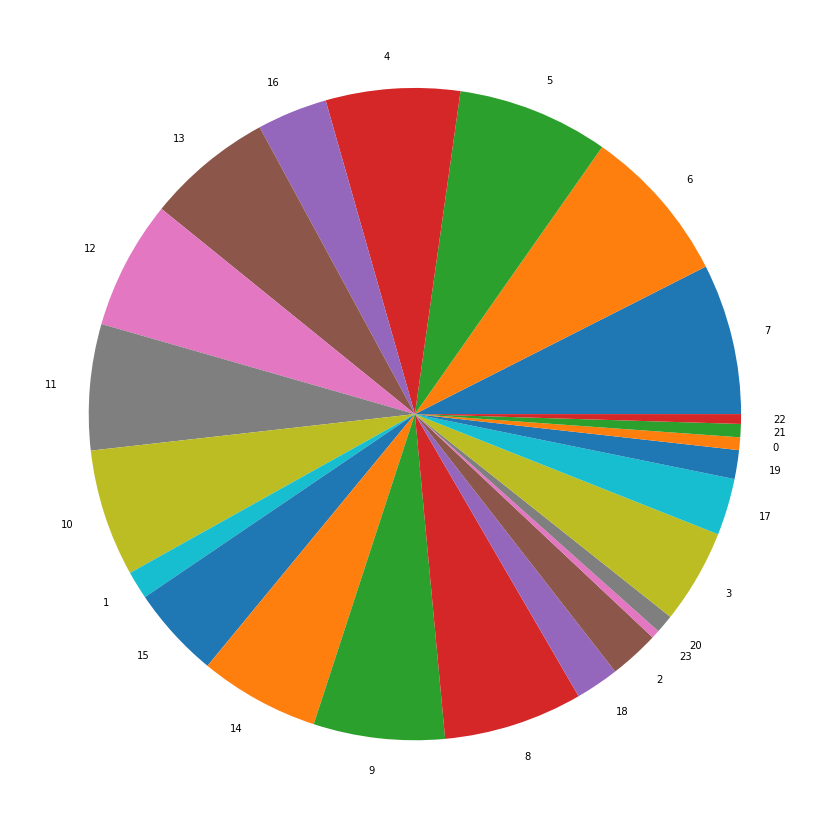

In [ ]:
plt.pie(values, labels = keys)
plt.show()

### Most of the messages come in the evening around 6pm - 8pm